# 1) Simulation of a radio signal

Import necessary labraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import random
%matplotlib inline

Parameters definition

In [172]:
num_samples=1000   #number of samples
freq_range=np.linspace(1418,1422,num_samples)   #array of frequencies,must include 1420MHz
time_segments=100

Creation of background signal

In [173]:
background=np.sin((freq_range-1418)*np.pi)*0.1

In [119]:
background

array([ 0.00000000e+00,  1.25786178e-03,  2.51552454e-03,  3.77278927e-03,
        5.02945704e-03,  6.28532900e-03,  7.54020646e-03,  8.79389084e-03,
        1.00461838e-02,  1.12968871e-02,  1.25458030e-02,  1.37927338e-02,
        1.50374822e-02,  1.62798512e-02,  1.75196443e-02,  1.87566653e-02,
        1.99907185e-02,  2.12216086e-02,  2.24491409e-02,  2.36731210e-02,
        2.48933554e-02,  2.61096510e-02,  2.73218154e-02,  2.85296566e-02,
        2.97329837e-02,  3.09316061e-02,  3.21253344e-02,  3.33139795e-02,
        3.44973534e-02,  3.56752688e-02,  3.68475395e-02,  3.80139798e-02,
        3.91744053e-02,  4.03286322e-02,  4.14764781e-02,  4.26177612e-02,
        4.37523010e-02,  4.48799180e-02,  4.60004337e-02,  4.71136709e-02,
        4.82194534e-02,  4.93176062e-02,  5.04079556e-02,  5.14903290e-02,
        5.25645553e-02,  5.36304643e-02,  5.46878875e-02,  5.57366576e-02,
        5.67766086e-02,  5.78075760e-02,  5.88293965e-02,  5.98419086e-02,
        6.08449521e-02,  

Add Gaussion noise to the background for each time segment to create the "off" signal

In [174]:
off_signal=np.zeros((time_segments,num_samples))  #2D array for the waterfall

In [175]:
for i in range(time_segments):
    noise=np.random.randn(num_samples) #Gaussian noise
    off_signal[i,:]=background+noise
    

Heatmap

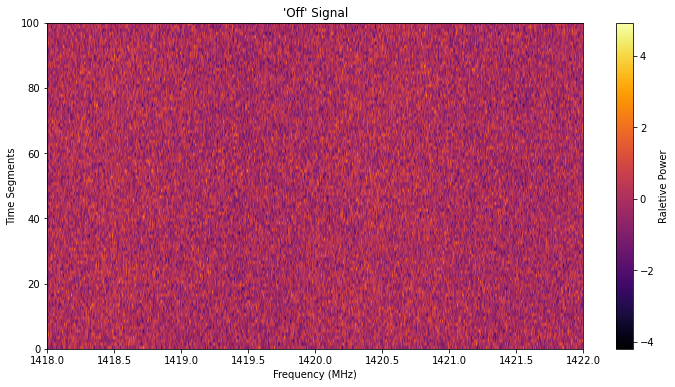

In [176]:
plt.figure(figsize=(12,6))
plt.imshow(off_signal,aspect='auto',cmap='inferno',extent=[1418,1422,0,time_segments])
plt.colorbar(label='Raletive Power')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Segments')
plt.title("'Off' Signal")
plt.show()


Realistic Signal

In [177]:
#to create a more realistic signal we are going to use 'red' noise

r_noise=np.random.randn(num_samples) #random noise
r_noise=np.cumsum(r_noise)  #integrated noise
r_noise=r_noise/np.max(np.abs((r_noise)))  #normalization

In [178]:
signal_r=np.zeros((time_segments,num_samples))

In [179]:
for i in range(time_segments):
    noise=np.random.randn(num_samples) #Gaussian noise
    signal=background+r_noise+noise #background+red noise+Gaussian noise
    signal_r[i,:]=signal
    

Heatmap of a more realistic signal

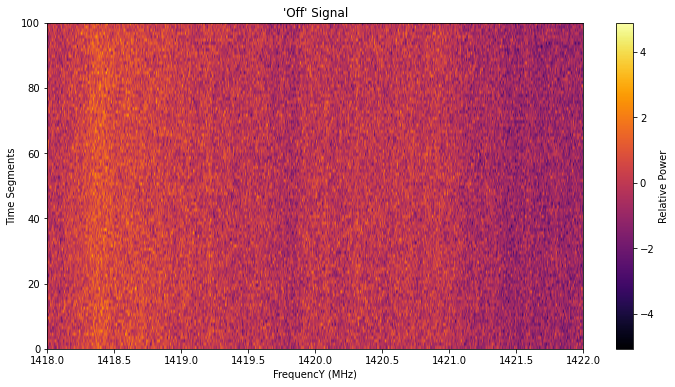

In [180]:
plt.figure(figsize=(12,6))
plt.imshow(signal_r,aspect='auto',cmap='inferno',extent=[1418,1422,0,time_segments])
plt.colorbar(label='Relative Power')
plt.xlabel('FrequencY (MHz)')
plt.ylabel('Time Segments')
plt.title("'Off' Signal")
plt.show()

# Signal with Spectral Line

Creation of a signal

In [181]:
background=np.sin(2*np.pi*(freq_range-1418)/5)

In [182]:
#create an 'off' signal
off_signal=np.zeros((time_segments,num_samples))
for i in range(time_segments):
    noise=np.random.normal(0,0.1,num_samples) #Gaussian noise
    off_signal[i,:]=background+noise

In [183]:
#create the spectral line
spectral_line = np.exp(-((freq_range - 1420)**2) / (2 * 0.05**2))

In [184]:
#create 'on' signal (background+noise+spectral line)
spectral=np.copy(off_signal)

for i in range(time_segments):
    spectral[i,:]+=spectral_line

Heatmap with Spectral Line(Hydrogen line)

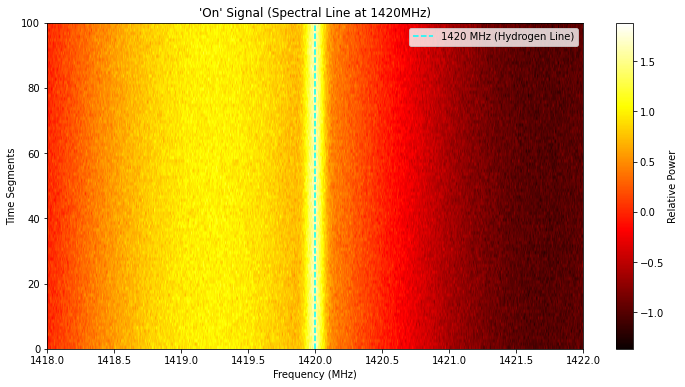

In [185]:
plt.figure(figsize=(12,6))
plt.imshow(spectral,aspect='auto',cmap='hot',extent=[1418,1422,0,time_segments])
plt.colorbar(label='Relative Power')
plt.title("'On' Signal (Spectral Line at 1420MHz)")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Segments')
plt.axvline(x=1420, color='cyan', linestyle='--', linewidth=1.5, label='1420 MHz (Hydrogen Line)')
plt.legend()
plt.show()

# Upsampling

In [186]:
sample_2=2*num_samples
freq_range_2=np.linspace(1418,1422,sample_2)

In [187]:
background=np.sin(2*np.pi*(freq_range_2-1418)/5)

In [188]:
#create an 'off' signal
off_signal=np.zeros((time_segments,sample_2))
for i in range(time_segments):
    noise=np.random.normal(0,0.1,sample_2) #Gaussian noise
    off_signal[i,:]=background+noise

In [189]:
#create the spectral line
spectral_line = np.exp(-((freq_range_2 - 1420)**2) / (2 * 0.05**2))

In [190]:
#create 'on' signal (background+noise+spectral line)
spectral2=np.copy(off_signal)

for i in range(time_segments):
    spectral2[i,:]+=spectral_line

Heatmap with Hydrogen Line (twice the sample)

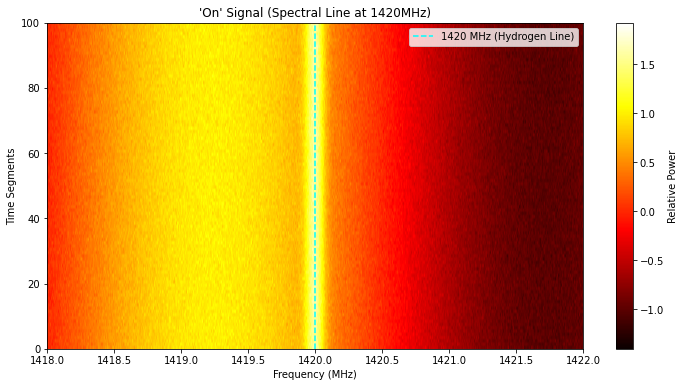

In [191]:
plt.figure(figsize=(12,6))
plt.imshow(spectral2,aspect='auto',cmap='hot',extent=[1418,1422,0,time_segments])
plt.colorbar(label='Relative Power')
plt.title("'On' Signal (Spectral Line at 1420MHz)")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Segments')
plt.axvline(x=1420, color='cyan', linestyle='--', linewidth=1.5, label='1420 MHz (Hydrogen Line)')
plt.legend()
plt.show()

# 2) Signal Smoothing

1)Averaging over time

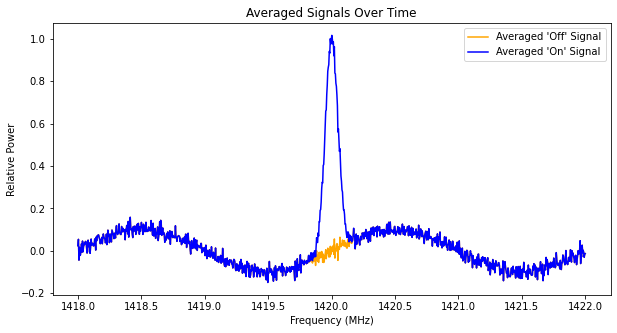

In [192]:
#create new signals ('on' and 'off')
samples=1000
time_segments=100
freq=np.linspace(1418,1422,samples)


#'off' signal
background=np.sin((freq_range-1418)*np.pi)*0.1

signal_off=np.zeros((time_segments,samples))

for i in range(time_segments):
    noise=np.random.normal(0,0.2,samples)
    signal_off[i,:]=background+noise
    
#'on' signal
#create the spectral line
spectral_line = np.exp(-((freq_range - 1420)**2) / (2 * 0.05**2))


signal_on=np.copy(signal_off)

for i in range(time_segments):
    signal_on[i,:]+=spectral_line
    
    
    
#average over time for both signals
avg_off=np.mean(signal_off,axis=0)
avg_on=np.mean(signal_on,axis=0)



#Plot
plt.figure(figsize=(10, 5))
plt.plot(freq,avg_off,label="Averaged 'Off' Signal", color='orange')
plt.plot(freq,avg_on,label="Averaged 'On' Signal", color='blue')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.title('Averaged Signals Over Time')
plt.legend()
plt.show()

2)Removing background

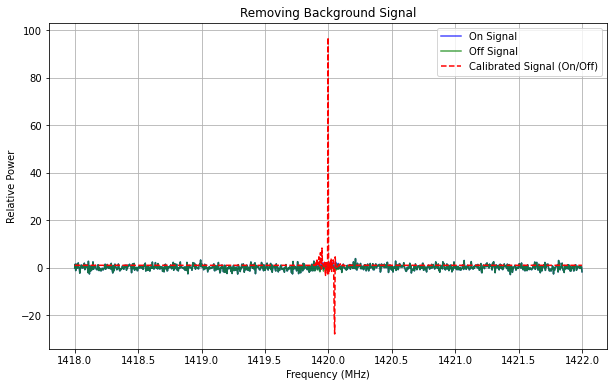

In [194]:
#create new signals ('on' and 'off')
samples=1000
time_segments=100
freq=np.linspace(1418,1422,samples)


#'off' signal
background=np.sin((freq_range-1418)*np.pi)*0.1

signal_off=background+np.random.randn(samples)
    
#'on' signal
#create the spectral line
spectral_line = np.exp(-((freq_range - 1420)**2) / (2 * 0.05**2))

signal_on=signal_off+spectral_line
    
    
calibrated=signal_on/signal_off


plt.figure(figsize=(10, 6))
plt.plot(freq,signal_on,label="On Signal",color='blue',alpha=0.7)
plt.plot(freq,signal_off,label="Off Signal",color='green',alpha=0.7)
plt.plot(freq,calibrated,label="Calibrated Signal (On/Off)",color='red',linestyle='--')
plt.title("Removing Background Signal")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.grid(True)
plt.show()

3)Moving average

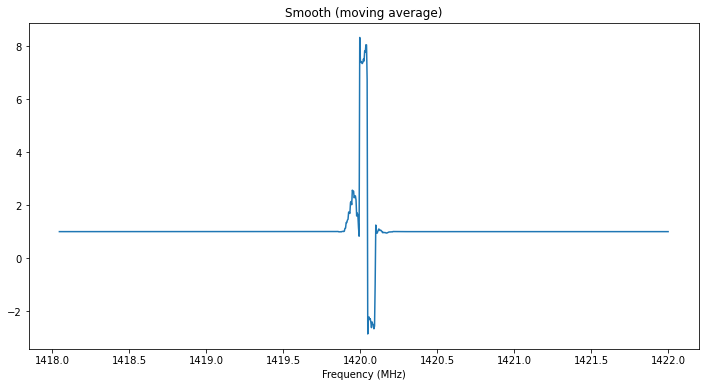

In [195]:
s=pd.Series(calibrated)

smooth=s.rolling(window=13).mean()



#plot
plt.figure(figsize=(12,6))
plt.plot(freq,smooth.values)
plt.title('Smooth (moving average)')
plt.xlabel('Frequency (MHz)')
plt.show()


# 3) Spectral Line Detection

In [141]:
#create a new signal

#'off' signal
background=np.sin((freq_range-1418)*np.pi)*0.1

signal_off=background+np.random.randn(samples)
    
#'on' signal
#create the spectral line
spectral_line = np.exp(-((freq_range - 1420)**2) / (2 * 0.05**2))

signal_on=signal_off+spectral_line
    
    
peak_frequency = freq[np.argmax(signal_on)]
print(f"The peak of the spectral line is at {peak_frequency} MHz")

The peak of the spectral line is at 1418.3563563563564 MHz


# 4) Upsampling

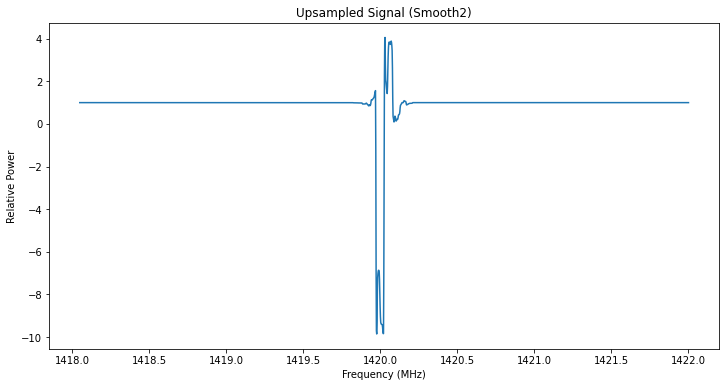

In [142]:
from scipy.interpolate import interp1d

# Linear interpolation for upsampling
upsample= interp1d(freq,smooth,kind='linear',fill_value="extrapolate")
freq_2= np.linspace(1418,1422,2000)
smooth2= upsample(freq_2)

plt.figure(figsize=(12,6))
plt.plot(freq_2,smooth2)
plt.title("Upsampled Signal (Smooth2)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

# 5) Spectral Line Fitting

In [79]:
from scipy.optimize import curve_fit

def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

# Fit the spectral line to a Gaussian
params,covar = curve_fit(gaussian,freq,smooth,p0=[1, 1420, 0.1])

fitted_spectral_line = gaussian(freq,*params)

plt.plot(freq,smooth,label='Smooth Signal')
plt.plot(freq,fitted_spectral_line, label='Fitted Spectral Line', linestyle='--')
plt.title("Spectral Line Fitting")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.show()

ValueError: array must not contain infs or NaNs

# 6) Error Estimation

# 7.1) Different Type of Noise

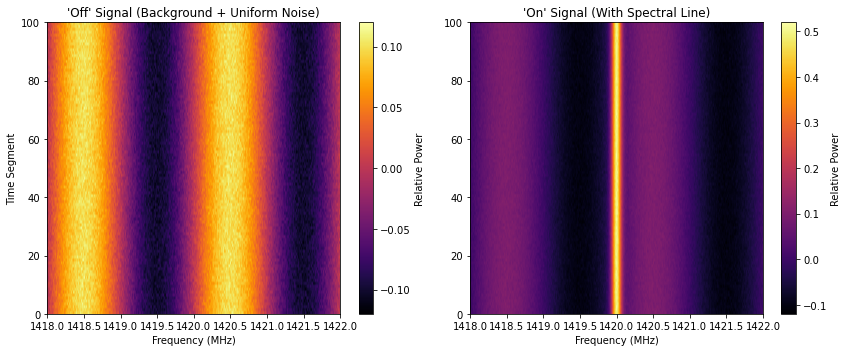

In [108]:
samples = 1000       
time_segments = 100   
freq = np.linspace(1418, 1422, samples)  

background = np.sin((freq - 1418) * np.pi) * 0.1


noise_uniform = np.random.uniform(-0.02, 0.02, size=(time_segments, samples))  
off_signal = background + noise_uniform

#Create a spectral line at 1420 MHz
spectral_line = np.exp(-((freq - 1420)**2) / (2 * 0.05**2)) * 0.5


on_signal = off_signal + spectral_line

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Off signal heatmap
im1 = axs[0].imshow(off_signal, aspect='auto', cmap='inferno', extent=[1418, 1422, 0, time_segments])
axs[0].set_title("'Off' Signal (Background + Uniform Noise)")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Time Segment")
fig.colorbar(im1, ax=axs[0], label="Relative Power")

# On signal heatmap
im2 = axs[1].imshow(on_signal, aspect='auto', cmap='inferno', extent=[1418, 1422, 0, time_segments])
axs[1].set_title("'On' Signal (With Spectral Line)")
axs[1].set_xlabel("Frequency (MHz)")
fig.colorbar(im2, ax=axs[1], label="Relative Power")

plt.tight_layout()
plt.show()

Upsampling

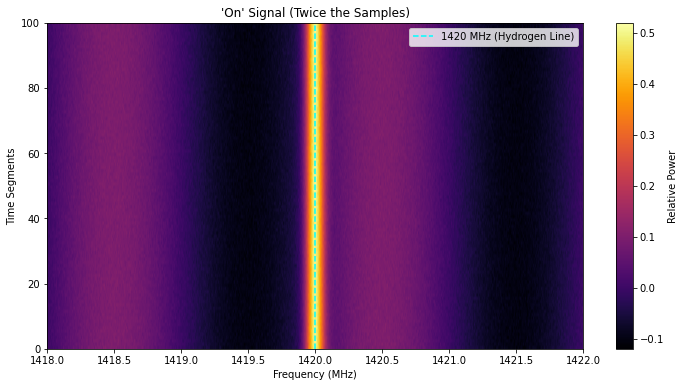

In [112]:
samples = 2000       
time_segments = 100   
freq = np.linspace(1418, 1422, samples)  


background = np.sin((freq - 1418) * np.pi) * 0.1


noise_uniform = np.random.uniform(-0.02, 0.02, size=(time_segments, samples))  
off_signal = background + noise_uniform

#Create a spectral line at 1420 MHz
spectral_line = np.exp(-((freq - 1420)**2) / (2 * 0.05**2)) * 0.5


on_signal = off_signal + spectral_line


plt.figure(figsize=(12,6))
plt.imshow(on_signal,aspect='auto',cmap='inferno',extent=[1418,1422,0,time_segments])
plt.colorbar(label='Relative Power')
plt.title("'On' Signal (Twice the Samples)")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Segments')
plt.axvline(x=1420, color='cyan',linestyle='--',linewidth=1.5,label='1420 MHz (Hydrogen Line)')
plt.legend()
plt.show()

# 7.2) Different Background Calibration

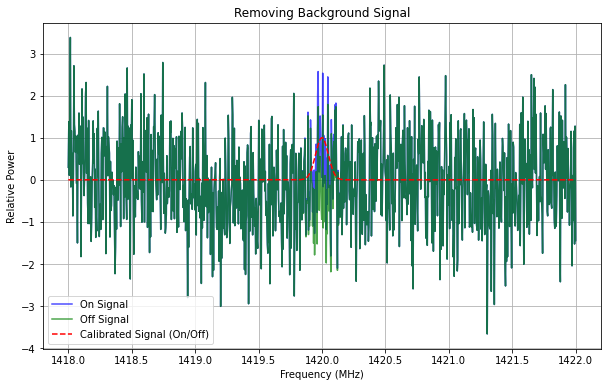

In [113]:
#create new signals ('on' and 'off')
samples=1000
time_segments=100
freq=np.linspace(1418,1422,samples)


#'off' signal
background=np.sin((freq_range-1418)*np.pi)*0.1

signal_off=background+np.random.randn(samples)
    
#'on' signal
#create the spectral line
spectral_line = np.exp(-((freq_range - 1420)**2) / (2 * 0.05**2))

signal_on=signal_off+spectral_line
    
    
calibrated=signal_on-signal_off


plt.figure(figsize=(10, 6))
plt.plot(freq,signal_on,label="On Signal",color='blue',alpha=0.7)
plt.plot(freq,signal_off,label="Off Signal",color='green',alpha=0.7)
plt.plot(freq,calibrated,label="Calibrated Signal (On/Off)",color='red',linestyle='--')
plt.title("Removing Background Signal")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.grid(True)
plt.show()

# 7.3) Different Smoothing Algorithm

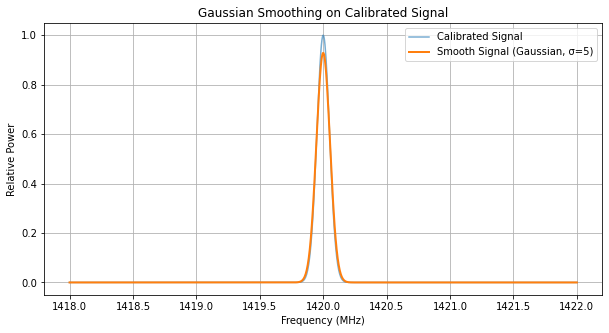

In [114]:
from scipy.ndimage import gaussian_filter1d


# Apply Gaussian smoothing
sigma = 5  # Controls the smoothing strength
smooth_signal_gaussian = gaussian_filter1d(calibrated,sigma)

# Plot the original vs. smoothed signal
plt.figure(figsize=(10, 5))
plt.plot(freq,calibrated,label="Calibrated Signal", alpha=0.6)
plt.plot(freq,smooth_signal_gaussian, label=f"Smooth Signal (Gaussian, σ={sigma})", linewidth=2)
plt.title("Gaussian Smoothing on Calibrated Signal")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.grid(True)
plt.show()

# 7.4)Different Interpolation

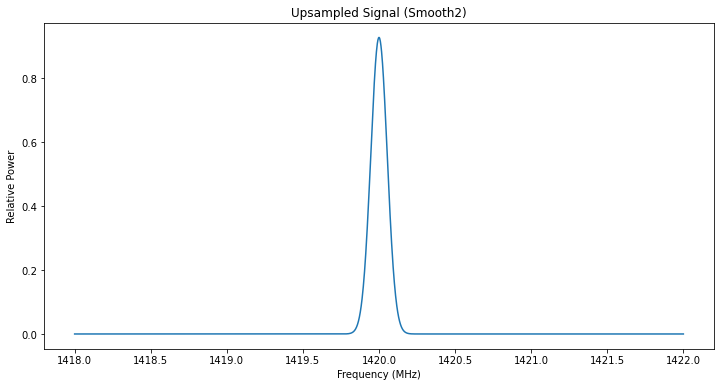

In [205]:
upsample= interp1d(freq,smooth_signal_gaussian,kind='cubic',fill_value="extrapolate")
freq_2= np.linspace(1418,1422,2000)
smooth2= upsample(freq_2)

plt.figure(figsize=(12,6))
plt.plot(freq_2,smooth2)
plt.title("Upsampled Signal (Smooth2)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()